# Explorative Analyse zu globalen Fluchtbewegungen (Time_Series.csv)

In diesem Notebook wird anhand der Datei time_series.csv untersucht, wie sich globale Fluchtbewegungen im Zeitverlauf entwickeln. Dabei werden sowohl die Perspektive der Zielländer als auch der Herkunftsländer betrachtet, um Muster von Aufnahme, Flucht und Rückkehr sichtbar zu machen.

Ziel der Analyse ist es, die folgenden Fragestellungen zu beantworten:

### Zielland

- Welche Populationstypen sind pro Jahr in einem ausgewählten Zielland angekommen?
- Aus welchen Herkunftsländern stammen die Personen, die in das Zielland geflüchtet sind, und wie verändert sich diese Herkunft über die Jahre?

### Herkunftsland

- Als welche Populationstypen wurden Personen registriert, die aus einem ausgewählten Herkunftsland geflüchtet sind, und wie entwickelt sich diese Klassifikation im Zeitverlauf?
- In welche Zielländer sind Personen geflüchtet, die aus dem jeweiligen Herkunftsland stammen, und wie verändern sich diese Zielländer über die Jahre?


# Import Setup

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [12]:
data_time_series=pd.read_csv("archive/time_series.csv")


/var/folders/mj/24_fhfyx7qz3h3m2t_23whxr0000gn/T/ipykernel_11600/3849381295.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_time_series=pd.read_csv("archive/time_series.csv")


# Zielland
Diese Funktion visualisiert, wie viele Menschen pro Jahr in ein bestimmtes Zielland angekommen sind, aufgeschlüsselt nach Populationstypen, um zu verstehen, welche Arten von Migrantinnen und Migranten das Land über die Zeit aufgenommen hat.

In [13]:

def plot_population_type_of_origin(df, country):
    
    dest_col = "Country / territory of asylum/residence"

    # Datensatz auf das ausgewählte Zielland filtern
    sub = df[df[dest_col] == country].copy()
    sub["Value"] = pd.to_numeric(sub["Value"], errors="coerce")

    # Gruppieren nach Jahr und Populationstyp und summieren
    grouped = sub.groupby(["Year", "Population type"])["Value"].sum().reset_index()
    

    # Umformen der Daten, damit sie einfacher geplottet werden können
    # Jahre werden die x-Achse, Populationstypen die Balkengruppen
    pivoted = grouped.pivot(index="Year", columns="Population type", values="Value").fillna(0)

    # Erstellen eines Balkendiagramms
    pivoted.plot(kind="bar", stacked=False, figsize=(10,6))
    plt.title(f"Population Types arriving in {country} per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(title="Population type")
    plt.tight_layout()
    plt.show()

    return pivoted

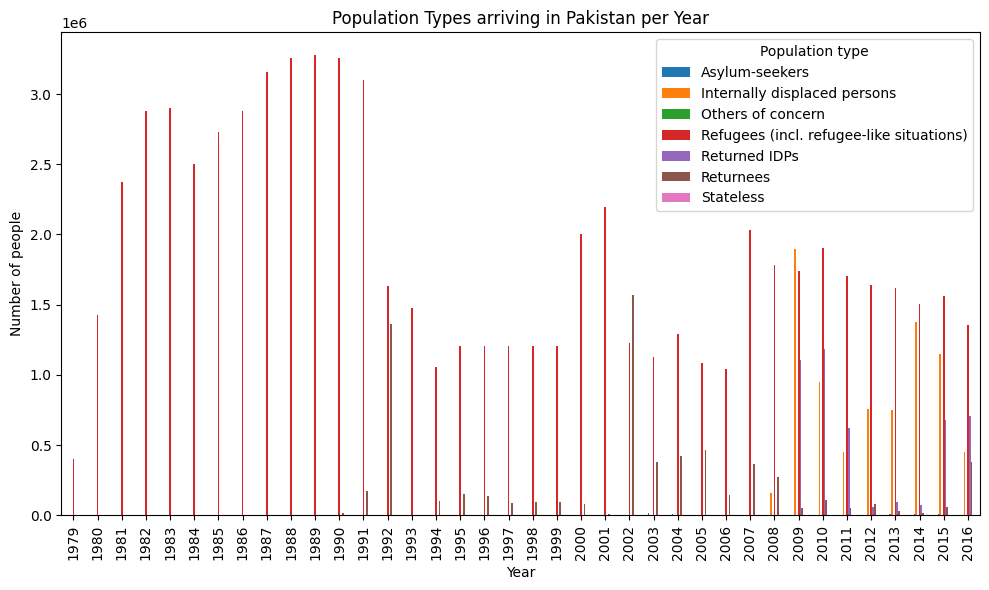

Population type,Asylum-seekers,Internally displaced persons,Others of concern,Refugees (incl. refugee-like situations),Returned IDPs,Returnees,Stateless
Year,,,,,,,
1979,0.0,0.0,0.0,400000.0,0.0,0.0,0.0
1980,0.0,0.0,0.0,1428230.0,0.0,0.0,0.0
1981,0.0,0.0,0.0,2375330.0,0.0,0.0,0.0
1982,0.0,0.0,0.0,2877480.0,0.0,0.0,0.0
1983,0.0,0.0,0.0,2901360.0,0.0,390.0,0.0
1984,0.0,0.0,0.0,2500000.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,2732440.0,0.0,2450.0,0.0
1986,0.0,0.0,0.0,2882100.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,3159000.0,0.0,0.0,0.0


In [14]:
plot_population_type_of_origin(data_time_series,"Pakistan")

Diese Funktion zeigt für ein ausgewähltes Zielland pro Jahr die fünf wichtigsten Herkunftsländer der ankommenden Personen, um zu analysieren, aus welchen Ländern die meisten Menschen in das Zielland geflüchtet sind und wie sich diese Herkunft im Zeitverlauf verändert.

In [15]:
def plot_top5_origins_overall(df, country):
    
    
    dest_col = "Country / territory of asylum/residence"

    # Datensatz auf das ausgewählte Zielland beschränken
    sub = df[df[dest_col] == country].copy()
    sub["Value"] = pd.to_numeric(sub["Value"], errors="coerce")


    # Gesamtanzahl pro Herkunftsland über alle Jahre summieren
    origin_totals = sub.groupby("Origin")["Value"].sum()

    # Die fünf Herkunftsländer mit den höchsten Gesamtwerten auswählen
    top5_origins = origin_totals.sort_values(ascending=False).head(5).index.tolist()
    top5_data = sub[sub["Origin"].isin(top5_origins)]

    # Gruppieren nach Jahr und Herkunftsland
    grouped = (
        top5_data
        .groupby(["Year", "Origin"])["Value"]
        .sum()
        .reset_index()
    )

    pivoted = grouped.pivot(
        index="Year",
        columns="Origin",
        values="Value"
    ).fillna(0)

    
    # Plot
    pivoted.plot(kind="bar", figsize=(12, 6))
    plt.title(f"Top 5 Origins of people arriving in {country} by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of People")
    plt.legend(title="Origin", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

   
    return pivoted

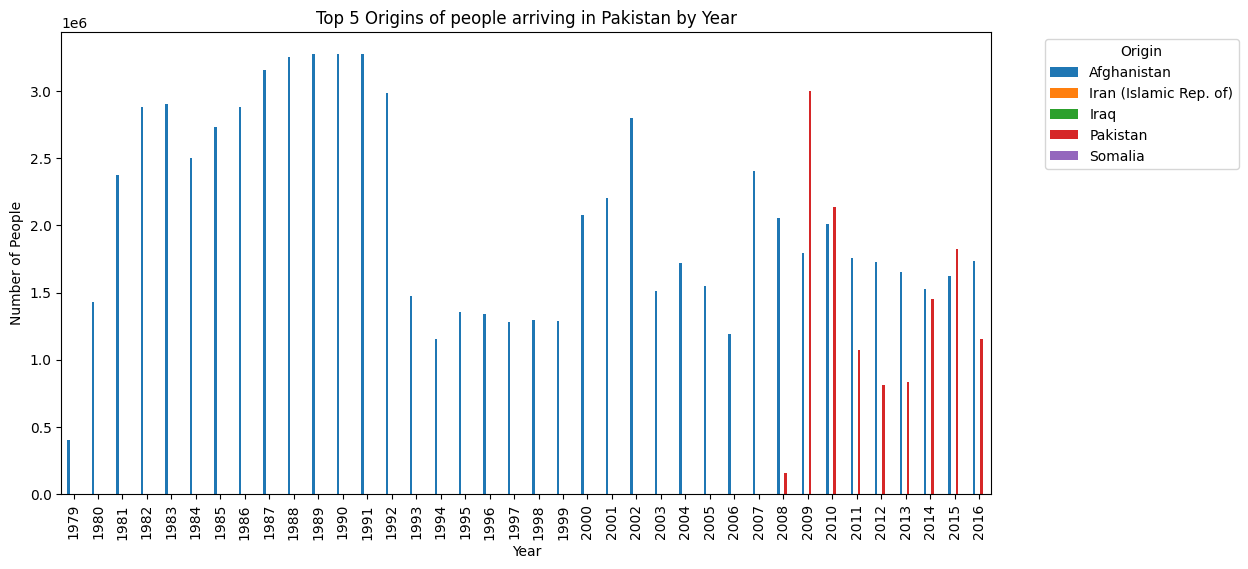

Origin,Afghanistan,Iran (Islamic Rep. of),Iraq,Pakistan,Somalia
Year,,,,,
1979,400000.0,0.0,0.0,0.0,0.0
1980,1428230.0,0.0,0.0,0.0,0.0
1981,2375330.0,0.0,0.0,0.0,0.0
1982,2877480.0,0.0,0.0,0.0,0.0
1983,2900000.0,1750.0,0.0,0.0,0.0
1984,2500000.0,0.0,0.0,0.0,0.0
1985,2729910.0,4880.0,0.0,0.0,0.0
1986,2878100.0,4000.0,0.0,0.0,0.0
1987,3156000.0,3000.0,0.0,0.0,0.0


In [16]:
plot_top5_origins_overall(data_time_series,"Pakistan")


# Herkunftsland 

Diese Funktion zeigt für ein ausgewähltes Herkunftsland, wie viele Menschen pro Jahr jeweils welchem Bevölkerungstyp zugeordnet wurden, um zu analysieren, in welcher Form Menschen das Land verlassen haben und wie sich diese Klassifikation im Zeitverlauf verändert.

In [17]:
def plot_origin_population(df, origin):
    
    # Datensatz auf das ausgewählte Zielland beschränken
    sub = df[df["Origin"] == origin].copy()
    sub["Value"] = pd.to_numeric(sub["Value"], errors="coerce")
    

    # Gruppieren nach Jahr und Populationstyp und aufsummieren
    grouped = sub.groupby(["Year", "Population type"])["Value"].sum().reset_index()
    pivoted = grouped.pivot(index="Year", columns="Population type", values="Value").fillna(0)

    # Plot
    pivoted.plot(kind="bar", stacked=False, figsize=(10,6))
    plt.title(f"Total people from {origin} by population type per year")
    plt.xlabel("Year")
    plt.ylabel("Number of people (individuals)")
    plt.legend(title="Population type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    return pivoted

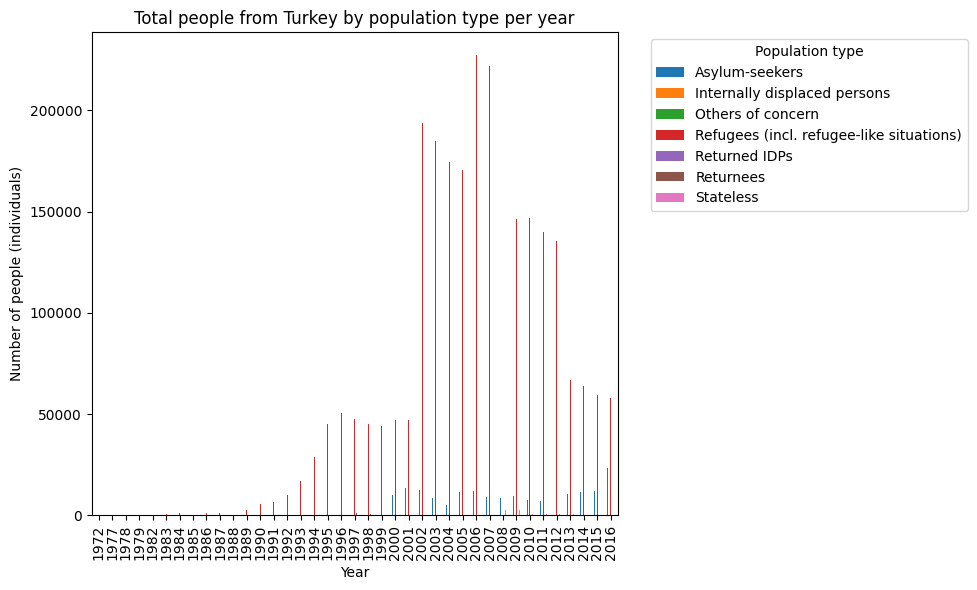

Population type,Asylum-seekers,Internally displaced persons,Others of concern,Refugees (incl. refugee-like situations),Returned IDPs,Returnees,Stateless
Year,,,,,,,
1972,0.0,0.0,0.0,250.0,0.0,0.0,0.0
1977,0.0,0.0,0.0,70.0,0.0,0.0,0.0
1978,0.0,0.0,0.0,60.0,0.0,0.0,0.0
1979,0.0,0.0,0.0,60.0,0.0,0.0,0.0
1982,0.0,0.0,0.0,300.0,0.0,80.0,0.0
1983,0.0,0.0,0.0,540.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,1040.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,810.0,0.0,310.0,0.0
1986,0.0,0.0,0.0,852.0,0.0,0.0,0.0


In [18]:
plot_origin_population(data_time_series,"Turkey")

Diese Funktion zeigt für ein ausgewähltes Herkunftsland pro Jahr die fünf wichtigsten Zielländer, in die Menschen geflohen sind, um zu analysieren, welche Länder bevorzugte Zufluchtsorte waren und wie sich diese Ziele im Zeitverlauf verändert haben.

In [19]:
def plot_top5_destinations(df, origin):
    
    origin_col = "Origin"
    dest_col = "Country / territory of asylum/residence"

    # Datensatz auf das ausgewählte Herkunftsland beschränken
    sub = df[df[origin_col] == origin].copy()
    sub["Value"] = pd.to_numeric(sub["Value"], errors="coerce")

    # Gesamtanzahl pro Zielland über alle Jahre berechnen
    dest_totals = sub.groupby(dest_col)["Value"].sum()

    # Die fünf Zielländer mit den höchsten Gesamtwerten auswählen
    top5_destinations = (
        dest_totals
        .sort_values(ascending=False)
        .head(5)
        .index
        .tolist()
    )

    top5_data = sub[sub[dest_col].isin(top5_destinations)]

    # Gruppieren nach Jahr und Zielland
    grouped = (
        top5_data
        .groupby(["Year", dest_col])["Value"]
        .sum()
        .reset_index()
    )

    pivoted = grouped.pivot(
        index="Year",
        columns=dest_col,
        values="Value"
    ).fillna(0)


    #Plot
    ax = pivoted.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Top 5 destinations of people from {origin} by year")
    plt.xlabel("Year")
    plt.ylabel("Number of people (individuals)")
    plt.legend(title="Destination country", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.ticklabel_format(style="plain", axis="y")

    plt.tight_layout()
    plt.show()

  
    return pivoted

Dass ein Land sowohl als Herkunfts als auch als Zielland erscheinen kann, entsteht dadurch, dass Personen ursprünglich aus dem Land geflohen sind und im betrachteten Zeitraum wieder in ihr Herkunftsland zurückkehren, wodurch Herkunfts- und Zielland identisch erfasst werden.

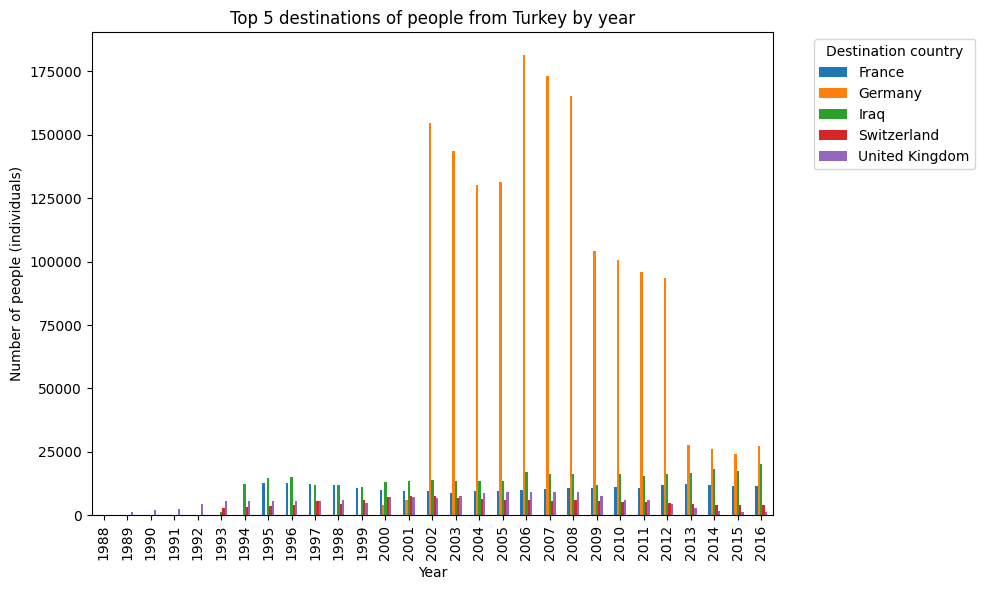

Country / territory of asylum/residence,France,Germany,Iraq,Switzerland,United Kingdom
Year,,,,,
1988,0.0,0.0,0.0,0.0,126.0
1989,0.0,0.0,0.0,0.0,1096.0
1990,0.0,0.0,0.0,0.0,2015.0
1991,0.0,0.0,0.0,0.0,2304.0
1992,0.0,0.0,0.0,0.0,4293.0
1993,0.0,0.0,1380.0,2801.0,5469.0
1994,0.0,0.0,12200.0,3410.0,5566.0
1995,12770.0,0.0,14791.0,3750.0,5637.0
1996,12594.0,0.0,15093.0,3870.0,5701.0


In [20]:
plot_top5_destinations(data_time_series,"Turkey")